In [89]:
import pandas as pd

###`Q-1:` You are given a Multi index DataFrame. You task is to swap level-0 index with level-0 column.
* Change Branch -> ('cse', 'ece') as columns at level-0 and ('delhi'	'mumbai') as level-0 Index
* And Sort on row index level-0

In [2]:
# Given Code Snippets
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
df = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

df

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [32]:
# code here
df.swaplevel(axis=1).stack().swaplevel(i=0,j=2).unstack().swaplevel(axis=1)

cse         ece      cse      ece
            avg_package avg_package students students
delhi  2019           1           9        2       10
       2020           3          11        4       12
       2021           5          13        6       14
       2022           7          15        8       16
mumbai 2019           0           0        0        0
       2020           0           0        0        0
       2021           0           0        0        0
       2022           0           0        0        0

###`Q-2:` Covid Cases Data Set Problem
 Make a DataFrame Using both Covid Dataset. With Country name as Level-0 and Provinance/State as Level-1 Index and date, No of cases and No of Deaths as Columns.

In [92]:
confirm = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTmqT3kxd0i0RUFiEnwA1Hboiunv28MeNTatZsIEqlPPB7mHrl0ttJL7utZ23_1s5FW8ZjODmB8jHIi/pub?gid=2142019845&single=true&output=csv')

deaths = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQn4nLCKIVZMw4e89YeRqgKaSAAwRFaZ6ILMW_FUejZ2tkv3Np1f9gD4QOl3ASHeLzWjOjfmLDKcCOF/pub?gid=212966958&single=true&output=csv")

In [91]:
pd.options.display.max_rows=50

In [104]:
# df=pd.concat([confirm,deaths],keys=['confirm','death'])
# df.reset_index().set_index(['level_0','Province/State','Country/Region'])
# df.reset_index()
df=confirm.drop(columns=['Lat','Long']).dropna().melt(id_vars=['Province/State','Country/Region'],var_name='Date',value_name='Confirm').merge( 
deaths.dropna().drop(columns=['Lat','Long']).melt(id_vars=['Province/State','Country/Region'],var_name='Date',value_name='Deaths')
,on=['Province/State','Country/Region','Date']).set_index(['Country/Region','Province/State'])
df

Date  Confirm  \
Country/Region Province/State                                                   
Australia      Australian Capital Territory                  1/22/20        0   
               New South Wales                               1/22/20        0   
               Northern Territory                            1/22/20        0   
               Queensland                                    1/22/20        0   
               South Australia                               1/22/20        0   
...                                                              ...      ...   
United Kingdom Jersey                                         1/2/23    65130   
               Montserrat                                     1/2/23     1403   
               Pitcairn Islands                               1/2/23        4   
               Saint Helena, Ascension and Tristan da Cunha   1/2/23     2166   
               Turks and Caicos Islands                       1/2/23     6479   

                                                             Deaths  
Country/Region Province/State                                        
Australia      Australian Capital Territory                       0  
               New South Wales                                    0  
               Northern Territory                                 0  
               Queensland                                         0  
               South Australia                                    0  
...                                                             ...  
United Kingdom Jersey                                           146  
               Montserrat                                         8  
               Pitcairn Islands                                   0  
               Saint Helena, Ascension and Tristan da Cunha       0  
               Turks and Caicos Islands                          36  

[95853 rows x 3 columns]

###`Q-3:` Show Country with Heighest death percent out of confirmed Cases.

In [136]:
# code here
df.reset_index().groupby('Country/Region').apply(lambda x: (x['Deaths']/x['Confirm'].sum())*100).sort_values().tail(1).droplevel(1)

Country/Region
China    0.001937
Name: Deaths, dtype: float64

### `Q-4` : Make a dataframe for India from Covid Data with one extra column representing no of new cases.

* Just for Assumption "No of new cases" will be equal to difference of "no of cases" with previous day.
* First day new cases will be NaN or equal to no of cases

Say on 12/30/22 No of cases is - 44679608	and a day previous (12/29/22) no of cases is - 44679382.

Then for 12/30/22 -> No of New Cases  = 44679608 - 44679382 =

Note:- Try using shift Function

Try using the shift function

```
s = pd.Series([1,2,3,4,5,6])
s #-> [1,2,3,4,5,6]
s.shift(1) #-> [NaN, 1,2,3,4,5]
s.shift(-1) #-> [2,3,4,5,6, NaN]
```

In [188]:
# code here
a1=confirm[confirm['Country/Region']=='India'].drop(columns=['Province/State','Lat','Long']).melt(id_vars=['Country/Region'],var_name='Date',value_name='Confirm')
a2=deaths[deaths['Country/Region']=='India'].drop(columns=['Province/State','Lat','Long']).melt(id_vars=['Country/Region'],var_name='Date',value_name='Deaths')
df=a1.merge(a2,on=['Country/Region','Date'])
df['New cases']=df['Confirm']-df['Confirm'].shift(1).fillna(0)
df.loc[50:55]

,Country/Region,Date,Confirm,Deaths,New cases
50,India,3/12/20,73,1,11.0
51,India,3/13/20,82,2,9.0
52,India,3/14/20,102,2,20.0
53,India,3/15/20,113,2,11.0
54,India,3/16/20,119,2,6.0
55,India,3/17/20,142,3,23.0


### `Q-5:` Read the Dataset using the below given link and create a multi-index dataframe using the columns "Country" and "City/Town".

This dataset is about the most polluted cities in the world. You can get details from [here](https://www.kaggle.com/datasets/rajkumarpandey02/worlds-most-air-polluted-countries-cities).

**Dataset link:** https://tinyurl.com/2fe6vz4u Directly use this link to read.

**Task:**
1. Find out the name of the city of India which is most poluted based on PM10.
2. Find out the name of the city of India which has minumum pollution level based on PM10.
3. Do same operations (like 1 and 2) with the country China.
4. Make a pie chart based on the column "PM10" of the country Poland.
5. Make a bar chart based on the columns "PM2.5" and "PM10" of the countries Israel and Qatar.
6. Convert this MultiIndex DataFrame to Series by retaining the informations.

In [192]:
# code here
df=pd.read_csv('https://tinyurl.com/2fe6vz4u')
df=df.set_index(['Country','City/Town'])
df.head(1)

,,Unnamed: 0,Position,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
Country,City/Town,,,,,,,,
India,Kanpur,0,1,2016,173,>75%,319,NaN,2018


In [203]:
# q1
df.loc[('India')]['PM10'].sort_values().tail(1)

City/Town
Kanpur    319
Name: PM10, dtype: int64

In [205]:
# q2
df.loc[('India')]['PM10'].sort_values().head(1)


City/Town
Aizawl    44
Name: PM10, dtype: int64

In [210]:
# q3
print(df.loc[('China')]['PM10'].sort_values().tail(1))
df.loc[('China')]['PM10'].sort_values().head(1)

City/Town
Jinan    192
Name: PM10, dtype: int64


City/Town
Anshun    38
Name: PM10, dtype: int64

<Axes: ylabel='PM10'>

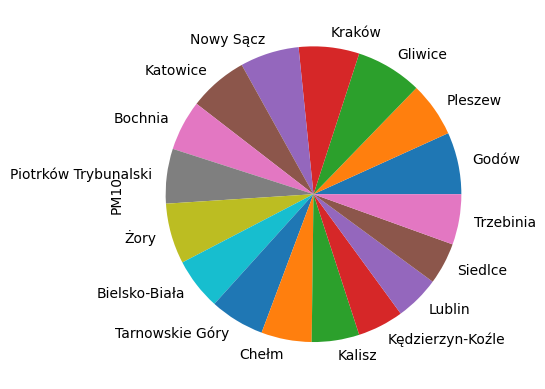

In [212]:
# q4
df.loc['Poland']['PM10'].plot(kind='pie')

<Axes: xlabel='Country,City/Town'>

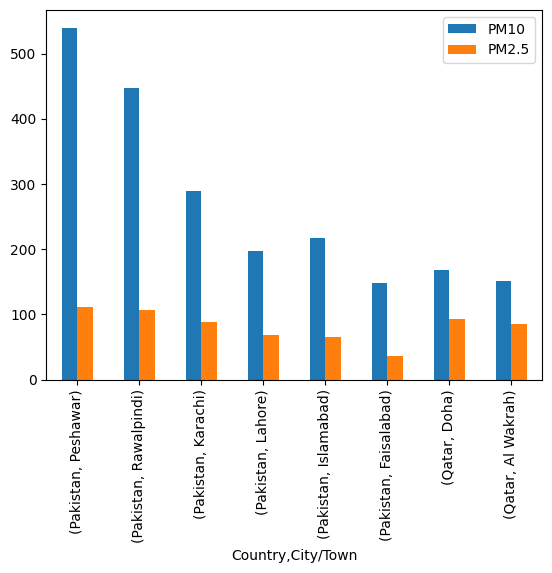

In [216]:
df.loc['Pakistan'][['PM10','PM2.5']].plot(kind='bar')

<Axes: xlabel='City/Town'>

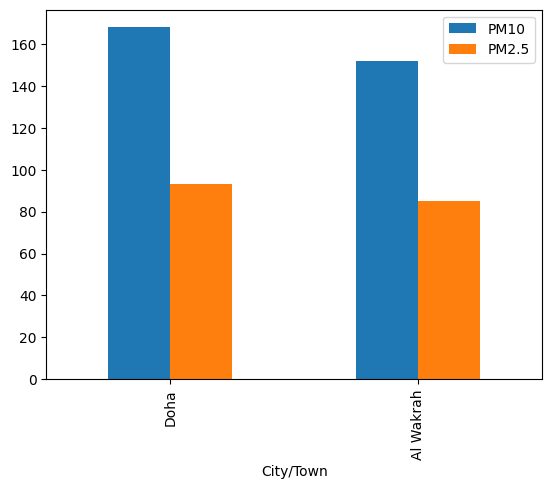

In [217]:
df.loc['Qatar'][['PM10','PM2.5']].plot(kind='bar')

In [224]:
df.stack()

Country  City/Town                         
India    Kanpur     Unnamed: 0                    0
                    Position                      1
                    Year                       2016
                    PM2.5                       173
                    Temporal coverage          >75%
                                               ... 
Turkey   Sivas      PM2.5                        27
                    Temporal coverage          >75%
                    PM10                         56
                    Temporal coverage.1        >75%
                    Database version (year)    2018
Length: 3138, dtype: object